<a href="https://colab.research.google.com/github/shearere2/Roadtrip/blob/main/US_Counties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyshp

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=11b52286ad8904818d9244e6753516a56d9efa058a30fc0a0d5e7ab037c7f693
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import wget

In [ ]:
file1 = wget.download('https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip')

In [ ]:
gdf = gpd.read_file(file1)

In [ ]:
gdf.loc[gdf['STATEFP'] == '42']

STATEFP COUNTYFP  COUNTYNS  GEOID          NAME             NAMELSAD  \
19        42      007  01214112  42007        Beaver        Beaver County   
47        42      053  01213669  42053        Forest        Forest County   
95        42      117  01209189  42117         Tioga         Tioga County   
108       42      043  01213667  42043       Dauphin       Dauphin County   
165       42      127  01213692  42127         Wayne         Wayne County   
...      ...      ...       ...    ...           ...                  ...   
3045      42      039  01213666  42039      Crawford      Crawford County   
3053      42      121  01213690  42121       Venango       Venango County   
3070      42      071  01209181  42071     Lancaster     Lancaster County   
3165      42      005  01213658  42005     Armstrong     Armstrong County   
3205      42      129  01209191  42129  Westmoreland  Westmoreland County   

     LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND  \
19     06      H1  G4020   430  38300     None        A  1125901370   
47     06      H1  G4020  None   None     None        A  1106623930   
95     06      H1  G4020  None   None     None        A  2936458661   
108    06      H1  G4020   276  25420     None        A  1359456340   
165    06      H1  G4020  None   None     None        A  1879296554   
...   ...     ...    ...   ...    ...      ...      ...         ...   
3045   06      H1  G4020   240  32740     None        A  2621848897   
3053   06      H1  G4020  None  36340     None        A  1746388602   
3070   06      H1  G4020  None  29540     None        A  2444751463   
3165   06      H1  G4020   430  38300     None        A  1691756729   
3205   06      H1  G4020   430  38300     None        A  2662612862   

         AWATER     INTPTLAT      INTPTLON  \
19     24162727  +40.6841401  -080.3507209   
47      8356609  +41.5133040  -079.2497050   
95      8267710  +41.7668593  -077.2572881   
108    86211444  +40.4125646  -076.7926343   
165    64785158  +41.6466021  -075.2924932   
...         ...          ...           ...   
3045   65300098  +41.6878760  -080.1077950   
3053   22149577  +41.4007143  -079.7658126   
3070  103278571  +40.0419921  -076.2501980   
3165   27587112  +40.8123805  -079.4641285   
3205   20837789  +40.3110682  -079.4666879   

                                               geometry  
19    POLYGON ((-80.51896 40.73374, -80.51896 40.734...  
47    POLYGON ((-79.20499 41.62640, -79.20129 41.626...  
95    POLYGON ((-77.43970 42.00007, -77.42822 42.000...  
108   POLYGON ((-76.98439 40.51456, -76.98441 40.514...  
165   POLYGON ((-75.45976 41.59504, -75.45980 41.595...  
...                                                 ...  
3045  POLYGON ((-80.51932 41.75766, -80.51932 41.759...  
3053  POLYGON ((-79.99978 41.36963, -79.99978 41.369...  
3070  POLYGON ((-76.64317 40.16562, -76.64268 40.165...  
3165  POLYGON ((-79.69129 40.89482, -79.69129 40.895...  
3205  POLYGON ((-79.61818 40.64477, -79.61799 40.644...  

[67 rows x 18 columns]

In [ ]:
gdf[['INTPTLAT', 'INTPTLON']] = gdf[['INTPTLAT', 'INTPTLON']].astype(float)

In [ ]:
usa = gdf.loc[gdf['INTPTLON']<-50]

In [ ]:
usa.plot(figsize=(100,100))

<Axes: >

<Axes: >

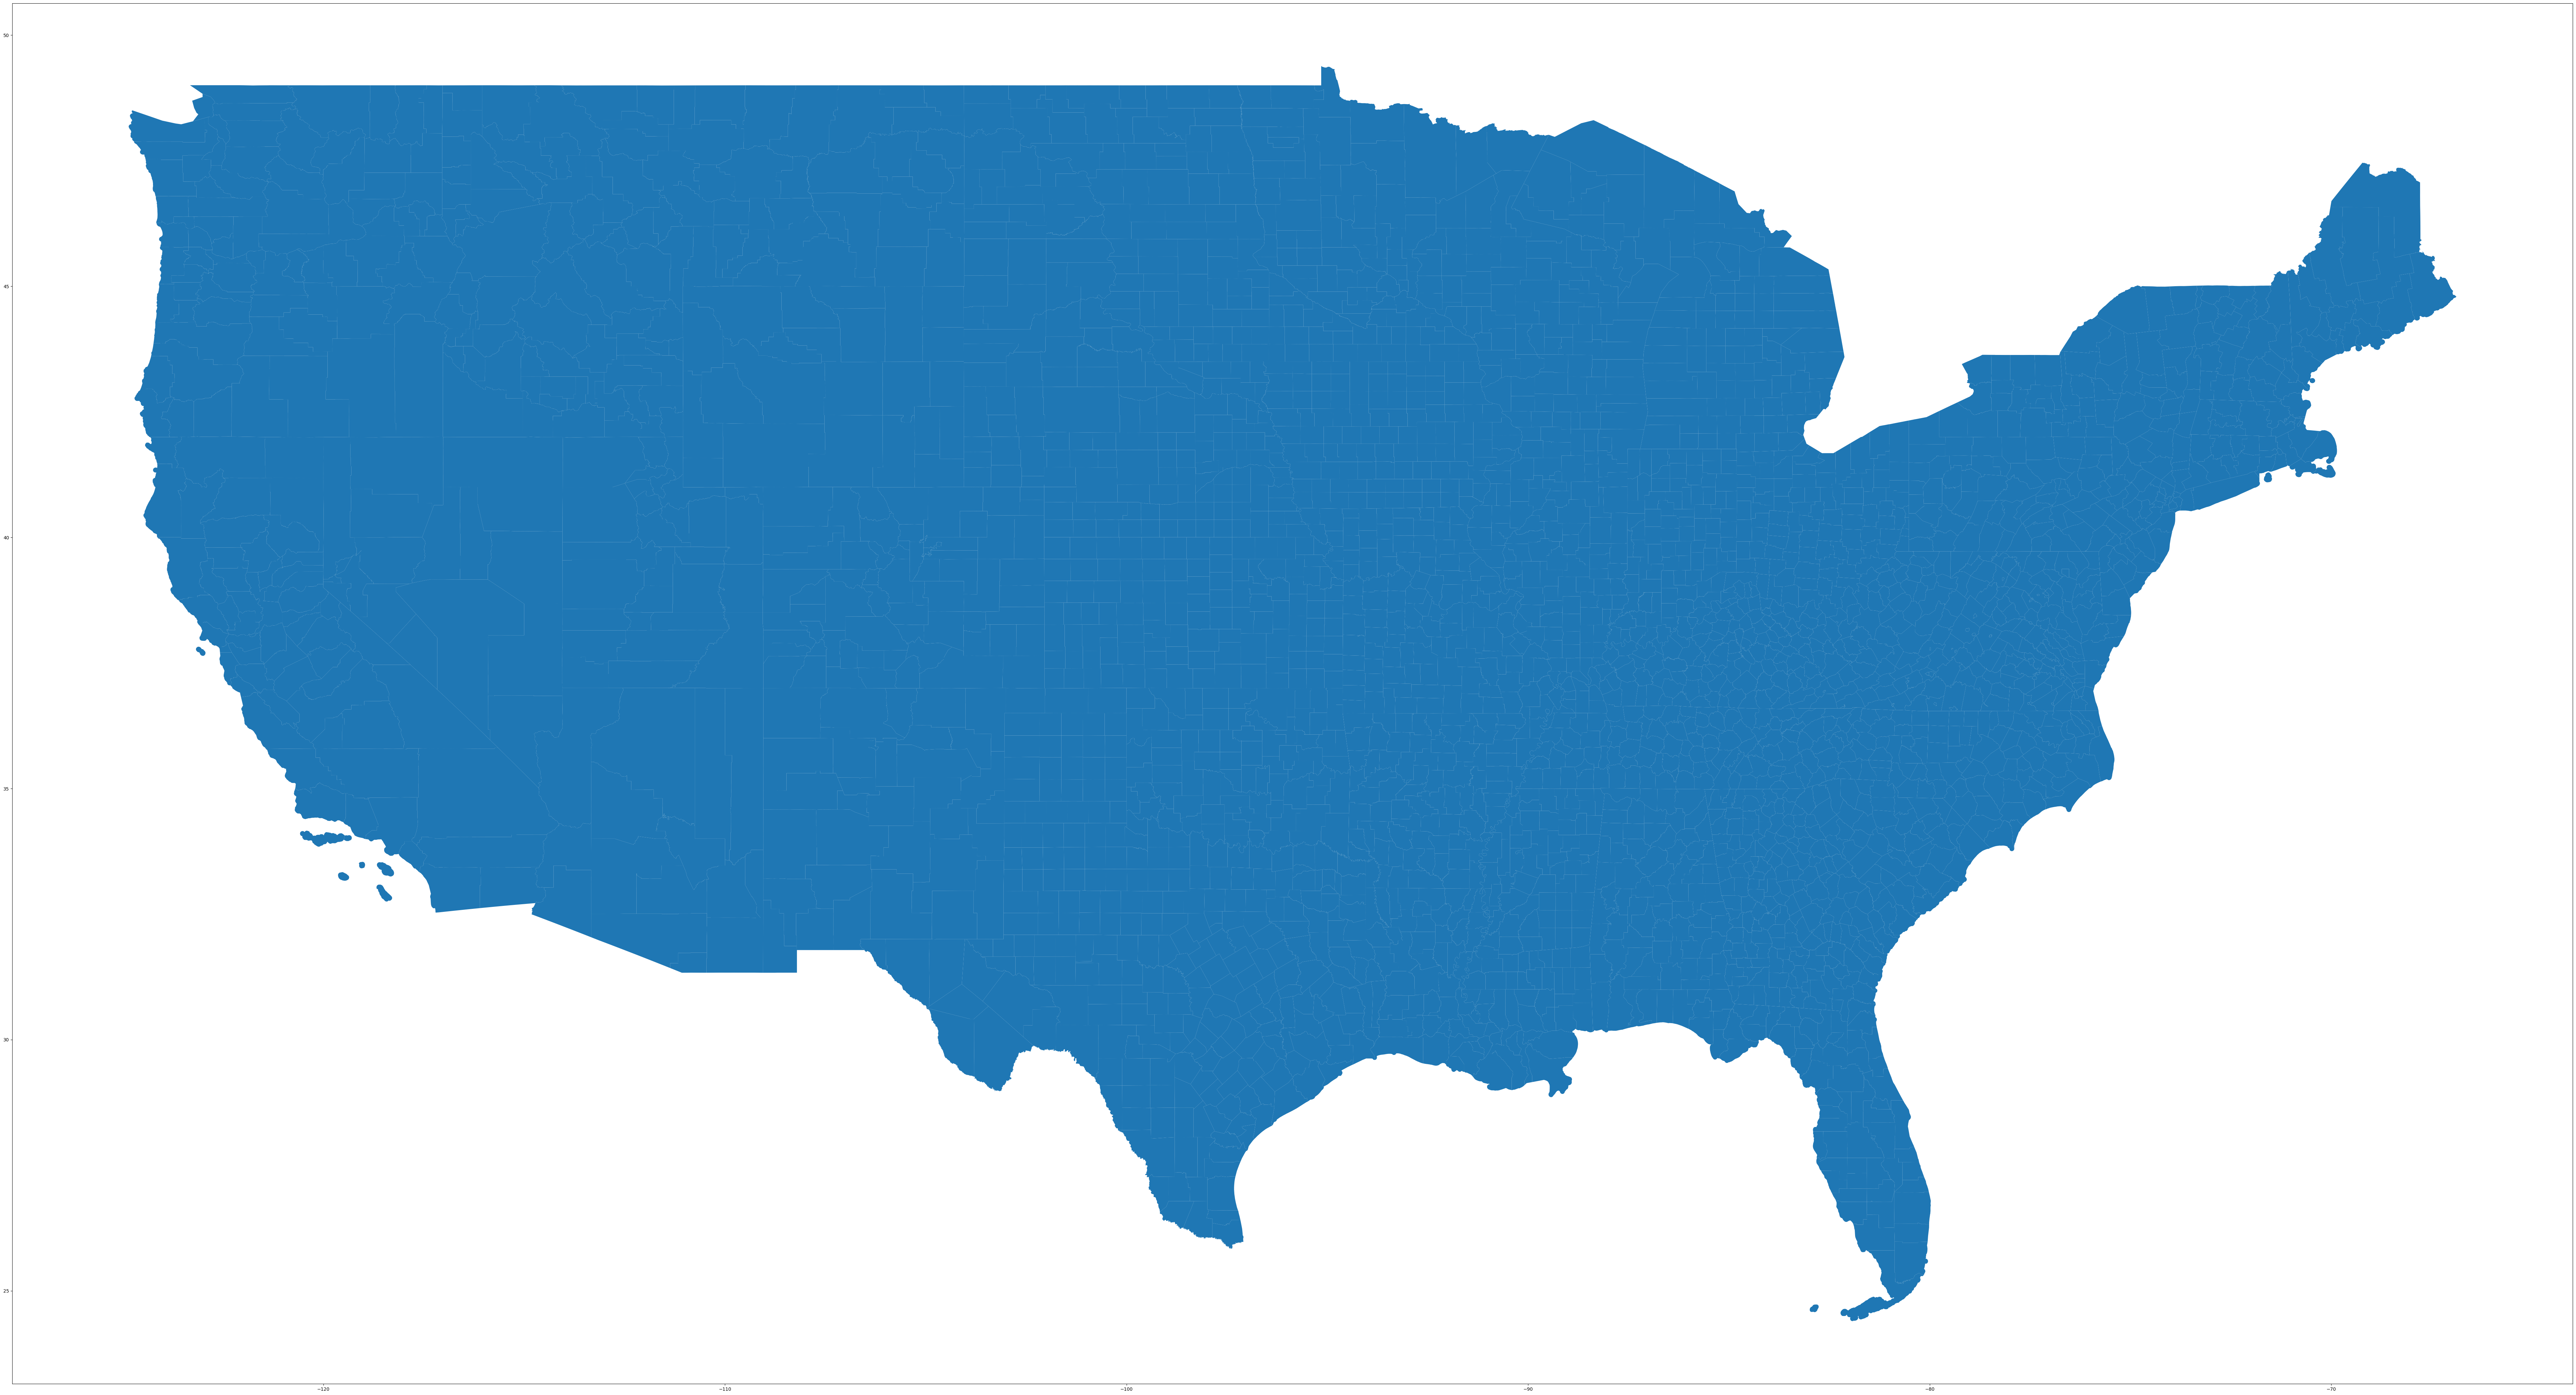

In [ ]:
continental = usa.loc[usa['INTPTLAT']>20]
continental = continental.loc[continental['INTPTLON']>-130]
continental.plot(figsize=(100,100), facecolor='None', edgecolor='Black', antialiased=False)

In [ ]:
continental.to_file('continental_us.zip')

Roads

In [ ]:
def make_country_map(file_names):
  roads = gpd.read_file('pennsylvania_roads.zip')
  for i in file_names:
    roads = pd.concat([roads, gpd.read_file(i)])
  return roads

In [ ]:
# continental_roads = make_country_map(file_names = ['alabama_roads.zip', 'arizona_roads.zip',
#                         'arkansas_roads.zip', 'california_roads.zip',
#                         'colorado_roads.zip', 'connecticut_roads.zip',
#                         'delaware_roads.zip', 'florida_roads.zip',
#                         'georgia_roads.zip', 'dc_roads.zip',
#                         'idaho_roads.zip', 'illinois_roads.zip',
#                         'indiana_roads.zip', 'iowa_roads.zip',
#                         'kansas_roads.zip', 'kentucky_roads.zip',
#                         'louisiana_roads.zip', 'maine_roads.zip',
#                         'maryland_roads.zip', 'massachusetts_roads.zip',
#                         'michigan_roads.zip', 'minnesota_roads.zip',
#                         'mississippi_roads.zip', 'missouri_roads.zip',
#                         'montana_roads.zip', 'nebraska_roads.zip',
#                         'nevada_roads.zip', 'newhampshire_roads.zip',
#                         'newjersey_roads.zip', 'newmexico_roads.zip',
#                         'newyork_roads.zip', 'northcarolina_roads.zip',
#                         'northdakota_roads.zip', 'ohio_roads.zip',
#                         'oklahoma_roads.zip', 'oregon_roads.zip',
#                         'rhodeisland_roads.zip', 'southcarolina_roads.zip',
#                         'southdakota_roads.zip', 'tennessee_roads.zip',
#                         'texas_roads.zip', 'utah_roads.zip',
#                         'vermont_roads.zip', 'virginia_roads.zip',
#                         'washington_roads.zip', 'westvirginia_roads.zip',
#                         'wisconsin_roads.zip', 'wyoming_roads.zip'])

In [ ]:
#continental_roads = continental_roads.set_index('LINEARID')

In [ ]:
#continental_roads['geometry'][23] #Example of what the geometries are

In [ ]:
 #continental_roads.plot()

LET'S DO THIS

In [ ]:
!pip install osmnx
import osmnx as ox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 2.7 MB/s eta 0:00:00


In [ ]:
G = ox.graph_from_place('Allegheny County, PA, USA', network_type='drive',
                        simplify=True)

In [ ]:
temp_storage = G.copy()

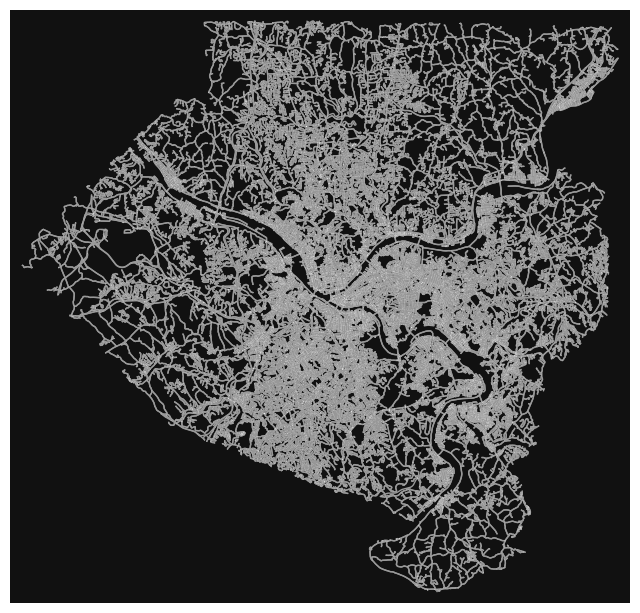

In [ ]:
fig, ax = ox.plot_graph(G, node_size=0.1)

In [ ]:
import geopandas as gpd
gdf = gpd.read_file('AlleghenyCountyMunicipalities.zip')

In [ ]:
polys = gdf['geometry']

In [ ]:
munis = polys.to_crs(epsg=4326)

In [ ]:
gdf['geometry'] = munis
munis = gdf

<Axes: >

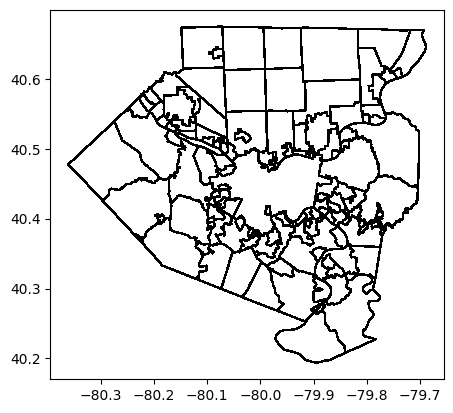

In [ ]:
munis.plot(facecolor='None', edgecolor='Black', antialiased=False)

###Experiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 1.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 54 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


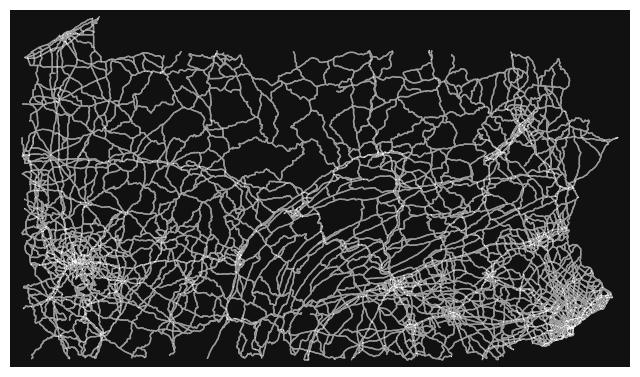

In [1]:
# GRAPH FROM PLACE
!pip install osmnx
import osmnx as ox
G = ox.graph_from_place('Pennsylvania, USA', network_type='drive', simplify=True, custom_filter='["highway"~"motorway|trunk|primary|secondary"]')
fig, ax = ox.plot_graph(G, node_size=0.1)

In [2]:
# SET START NODE TO KNOWN LOCATION FOR NOW
start_node = ox.distance.nearest_nodes(G, -79.367773, 41.208485)

In [3]:
# CHECK ATTRIBUTES WITH THE FOLLOWING
# x = 0
# for i in list(G.nodes()):
#   print(G.nodes()[i])
#   x += 1
#   if x == 1000:
#     break

In [4]:
# CHECK ADJACENCY VIEW WITH THE FOLLOWING
# x = 0
# for i in list(G.nodes()):
#   print(G.nodes()[i])
#   x += 1
#   if x == 1000:
#     break

In [6]:
import geopandas as gpd
gdf = gpd.read_file('PaCounty2024_05.zip')
polys = gdf['geometry']
munis = polys.to_crs(epsg=4326)
gdf['geometry'] = munis
munis = gdf
# munis.plot(facecolor='None', edgecolor='Black', antialiased=False)

In [7]:
munis

MSLINK  COUNTY_NAM COUNTY_NUM FIPS_COUNT  COUNTY_ARE  COUNTY_PER  \
0       46  MONTGOMERY         46        091         0.0         0.0   
1        8    BRADFORD         08        015         0.0         0.0   
2        9       BUCKS         09        017         0.0         0.0   
3       58       TIOGA         58        117         0.0         0.0   
4       59       UNION         59        119         0.0         0.0   
..     ...         ...        ...        ...         ...         ...   
62      61      WARREN         61        123         0.0         0.0   
63       6       BERKS         06        011         0.0         0.0   
64      15     CHESTER         15        029         0.0         0.0   
65      45      MONROE         45        089         0.0         0.0   
66      35  LACKAWANNA         35        069         0.0         0.0   

    NUMERIC_LA  COUNTY_N_1   AREA_SQ_MI SOUND  ... MAINT_CTY_ DISTRICT_O  \
0          5.0          46   487.427050  None  ...          4        6-4   
1          2.0           8  1161.337905  None  ...          9        3-9   
2          5.0           9   622.083587  None  ...          1        6-1   
3          2.0          58  1137.247962  None  ...          7        3-7   
4          2.0          59   319.189297  None  ...          8        3-8   
..         ...         ...          ...   ...  ...        ...        ...   
62         1.0          61   898.973160  None  ...          6        1-6   
63         5.0           6   865.659208  None  ...          1        5-1   
64         5.0          15   759.742734  None  ...          2        6-2   
65         2.0          45   615.548670  None  ...          4        5-4   
66         2.0          35   465.131190  None  ...          2        4-2   

   GIS_UPDATE GIS_GEOMET  GPID AREA  LEN     Shape_Leng    Shape_Area  \
0        None       None  1744  0.0  0.0  258604.883697  2.166140e+09   
1        None       None  1745  0.0  0.0  298321.648632  5.413086e+09   
2        None       None  1746  0.0  0.0  267969.255155  2.774727e+09   
3        None       None  1747  0.0  0.0  291163.817946  5.299046e+09   
4        None       None  1748  0.0  0.0  196854.532218  1.445163e+09   
..        ...        ...   ...  ...  ...            ...           ...   
62       None       None  1806  0.0  0.0  266224.234728  4.193681e+09   
63       None       None  1807  0.0  0.0  270706.448751  3.871134e+09   
64       None       None  1808  0.0  0.0  329986.426079  3.353191e+09   
65       None       None  1809  0.0  0.0  263378.139524  2.814066e+09   
66       None       None  1810  0.0  0.0  217267.441922  2.144217e+09   

                                             geometry  
0   POLYGON ((-75.44846 40.09112, -75.45629 40.087...  
1   POLYGON ((-76.88351 41.66631, -76.88385 41.669...  
2   POLYGON ((-75.16528 40.56436, -75.16497 40.564...  
3   POLYGON ((-76.88351 41.66631, -76.88127 41.648...  
4   POLYGON ((-76.92152 40.88579, -76.92204 40.885...  
..                                                ...  
62  POLYGON ((-79.60990 41.99875, -79.59201 41.998...  
63  POLYGON ((-75.54478 40.45641, -75.53606 40.450...  
64  MULTIPOLYGON (((-75.44846 40.09112, -75.44208 ...  
65  POLYGON ((-75.03971 41.03306, -75.03984 41.032...  
66  POLYGON ((-75.52361 41.64167, -75.47894 41.641...  

[67 rows x 26 columns]

<Axes: >

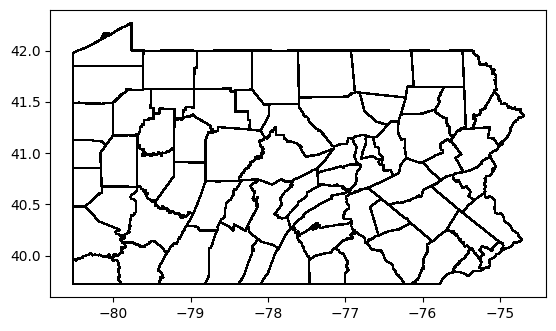

In [8]:
import pandas as pd
muni_list = munis['COUNTY_NAM']
muni_list = pd.DataFrame(muni_list)
munis.plot(facecolor='None', edgecolor='Black', antialiased=False)

In [9]:
G.nodes()[start_node]['y']

41.2125725

In [10]:
import shapely
for i in list(G.nodes()):
  for index, row in munis.iterrows():
    if (row['geometry'].contains(shapely.Point([G.nodes()[i]['x'], G.nodes()[i]['y']]))):
      hood = row['COUNTY_NAM']
      G.nodes()[i]['muni'] = hood

In [11]:
!pip install geopy
from geopy import geocoders

In [12]:
locator = geocoders.Nominatim(user_agent='shearere2@duq.edu')

In [13]:
indexes = [munis.loc[munis['COUNTY_NAM']=='CLARION'].index[0]]
for i in munis['COUNTY_NAM']:
  if i == 'CLARION':
    pass
  else:
    indexes.append(munis.loc[munis['COUNTY_NAM']==i].index[0])

In [14]:
munis = munis.reindex(indexes)

In [15]:
import networkx as nx
shared_borders = []
centroids = {}
county_graph = nx.Graph()
munis = munis
county_graph.add_nodes_from(munis['COUNTY_NAM'])
for i in list(county_graph.nodes()):
  print(i)
  coord = locator.geocode(f'{i.lower()} County, Pennsylvania')
  if coord != None:
    lat = coord.latitude
    lon = coord.longitude
    centroids[i] = (lat, lon)
  else:
    print('Error in finding coordinates for ' + i)


for index1, row1 in munis.iterrows():
  for index2, row2 in munis.iterrows():
    if row1['geometry'].touches(row2['geometry']):
      if f'{row1.COUNTY_NAM}+{row2.COUNTY_NAM}' in shared_borders or f'{row2.COUNTY_NAM}+{row1.COUNTY_NAM}' in shared_borders:
        pass
      else:
        print(f'{row1.COUNTY_NAM} and {row2.COUNTY_NAM} touch')
        shared_borders.append((row1['COUNTY_NAM'], row2['COUNTY_NAM']))
        distance = ((centroids[row1['COUNTY_NAM']][0] - centroids[row2['COUNTY_NAM']][0])**2 +
         (centroids[row1['COUNTY_NAM']][1] - centroids[row1['COUNTY_NAM']][1])**2)**0.5
        county_graph.add_edge(row1['COUNTY_NAM'], row2['COUNTY_NAM'], weight=distance)


CLARION
MONTGOMERY
BRADFORD
BUCKS
TIOGA
UNION
VENANGO
WASHINGTON
WAYNE
MCKEAN
MERCER
MIFFLIN
MONTOUR
NORTHAMPTON
NORTHUMBERLAND
PERRY
PIKE
POTTER
SCHUYLKILL
SNYDER
SOMERSET
SULLIVAN
LEBANON
BUTLER
CAMBRIA
CAMERON
CARBON
CENTRE
CLEARFIELD
CLINTON
COLUMBIA
CRAWFORD
CUMBERLAND
DAUPHIN
INDIANA
JEFFERSON
JUNIATA
LANCASTER
WESTMORELAND
WYOMING
YORK
PHILADELPHIA
LEHIGH
LUZERNE
LYCOMING
LAWRENCE
DELAWARE
ELK
ERIE
FAYETTE
FOREST
FRANKLIN
FULTON
GREENE
HUNTINGDON
ADAMS
ALLEGHENY
ARMSTRONG
BEAVER
BEDFORD
BLAIR
SUSQUEHANNA
WARREN
BERKS
CHESTER
MONROE
LACKAWANNA
CLARION and VENANGO touch
CLARION and BUTLER touch
CLARION and JEFFERSON touch
CLARION and FOREST touch
CLARION and ARMSTRONG touch
MONTGOMERY and BUCKS touch
MONTGOMERY and PHILADELPHIA touch
MONTGOMERY and LEHIGH touch
MONTGOMERY and DELAWARE touch
MONTGOMERY and BERKS touch
MONTGOMERY and CHESTER touch
BRADFORD and TIOGA touch
BRADFORD and SULLIVAN touch
BRADFORD and WYOMING touch
BRADFORD and LYCOMING touch
BRADFORD and SUSQUEHANNA touc

In [16]:
county_graph.edges()

EdgeView([('CLARION', 'VENANGO'), ('CLARION', 'BUTLER'), ('CLARION', 'JEFFERSON'), ('CLARION', 'FOREST'), ('CLARION', 'ARMSTRONG'), ('MONTGOMERY', 'BUCKS'), ('MONTGOMERY', 'PHILADELPHIA'), ('MONTGOMERY', 'LEHIGH'), ('MONTGOMERY', 'DELAWARE'), ('MONTGOMERY', 'BERKS'), ('MONTGOMERY', 'CHESTER'), ('BRADFORD', 'TIOGA'), ('BRADFORD', 'SULLIVAN'), ('BRADFORD', 'WYOMING'), ('BRADFORD', 'LYCOMING'), ('BRADFORD', 'SUSQUEHANNA'), ('BUCKS', 'NORTHAMPTON'), ('BUCKS', 'PHILADELPHIA'), ('BUCKS', 'LEHIGH'), ('TIOGA', 'POTTER'), ('TIOGA', 'LYCOMING'), ('UNION', 'MIFFLIN'), ('UNION', 'NORTHUMBERLAND'), ('UNION', 'SNYDER'), ('UNION', 'CENTRE'), ('UNION', 'CLINTON'), ('UNION', 'LYCOMING'), ('VENANGO', 'MERCER'), ('VENANGO', 'BUTLER'), ('VENANGO', 'CRAWFORD'), ('VENANGO', 'FOREST'), ('VENANGO', 'WARREN'), ('WASHINGTON', 'WESTMORELAND'), ('WASHINGTON', 'FAYETTE'), ('WASHINGTON', 'GREENE'), ('WASHINGTON', 'ALLEGHENY'), ('WASHINGTON', 'BEAVER'), ('WAYNE', 'PIKE'), ('WAYNE', 'SUSQUEHANNA'), ('WAYNE', 'MONROE'

AT THIS POINT WE HAVE MUNICIPALITY BORDER GRAPH *AND* ROAD NETWORK GRAPH, WITH INTERSECTION NODES HAVING MUNICIPALITY ATTRIBUTES

In [31]:
tsp = nx.approximation.traveling_salesman_problem(county_graph, weight='weight')
tsp

['CLARION',
 'VENANGO',
 'CRAWFORD',
 'WARREN',
 'ERIE',
 'WARREN',
 'MCKEAN',
 'POTTER',
 'TIOGA',
 'BRADFORD',
 'SUSQUEHANNA',
 'WAYNE',
 'PIKE',
 'WAYNE',
 'LACKAWANNA',
 'WYOMING',
 'SULLIVAN',
 'LYCOMING',
 'CLINTON',
 'CAMERON',
 'ELK',
 'FOREST',
 'VENANGO',
 'MERCER',
 'LAWRENCE',
 'BUTLER',
 'BEAVER',
 'BUTLER',
 'ARMSTRONG',
 'INDIANA',
 'CAMBRIA',
 'WESTMORELAND',
 'ALLEGHENY',
 'WESTMORELAND',
 'SOMERSET',
 'FAYETTE',
 'GREENE',
 'WASHINGTON',
 'WESTMORELAND',
 'CAMBRIA',
 'BLAIR',
 'HUNTINGDON',
 'JUNIATA',
 'DAUPHIN',
 'LEBANON',
 'BERKS',
 'MONTGOMERY',
 'BUCKS',
 'PHILADELPHIA',
 'DELAWARE',
 'CHESTER',
 'LANCASTER',
 'YORK',
 'ADAMS',
 'FRANKLIN',
 'FULTON',
 'BEDFORD',
 'FULTON',
 'FRANKLIN',
 'ADAMS',
 'CUMBERLAND',
 'PERRY',
 'JUNIATA',
 'MIFFLIN',
 'SNYDER',
 'NORTHUMBERLAND',
 'MONTOUR',
 'COLUMBIA',
 'LUZERNE',
 'MONROE',
 'CARBON',
 'NORTHAMPTON',
 'LEHIGH',
 'SCHUYLKILL',
 'NORTHUMBERLAND',
 'UNION',
 'CENTRE',
 'CLEARFIELD',
 'JEFFERSON',
 'CLARION']

The route of the traveller is: ['CLARION', 'VENANGO', 'CRAWFORD', 'WARREN', 'ERIE', 'WARREN', 'MCKEAN', 'POTTER', 'TIOGA', 'BRADFORD', 'SUSQUEHANNA', 'WAYNE', 'PIKE', 'WAYNE', 'LACKAWANNA', 'WYOMING', 'SULLIVAN', 'LYCOMING', 'CLINTON', 'CAMERON', 'ELK', 'FOREST', 'VENANGO', 'MERCER', 'LAWRENCE', 'BUTLER', 'BEAVER', 'BUTLER', 'ARMSTRONG', 'INDIANA', 'CAMBRIA', 'WESTMORELAND', 'ALLEGHENY', 'WESTMORELAND', 'SOMERSET', 'FAYETTE', 'GREENE', 'WASHINGTON', 'WESTMORELAND', 'CAMBRIA', 'BLAIR', 'HUNTINGDON', 'JUNIATA', 'DAUPHIN', 'LEBANON', 'BERKS', 'MONTGOMERY', 'BUCKS', 'PHILADELPHIA', 'DELAWARE', 'CHESTER', 'LANCASTER', 'YORK', 'ADAMS', 'FRANKLIN', 'FULTON', 'BEDFORD', 'FULTON', 'FRANKLIN', 'ADAMS', 'CUMBERLAND', 'PERRY', 'JUNIATA', 'MIFFLIN', 'SNYDER', 'NORTHUMBERLAND', 'MONTOUR', 'COLUMBIA', 'LUZERNE', 'MONROE', 'CARBON', 'NORTHAMPTON', 'LEHIGH', 'SCHUYLKILL', 'NORTHUMBERLAND', 'UNION', 'CENTRE', 'CLEARFIELD', 'JEFFERSON', 'CLARION']


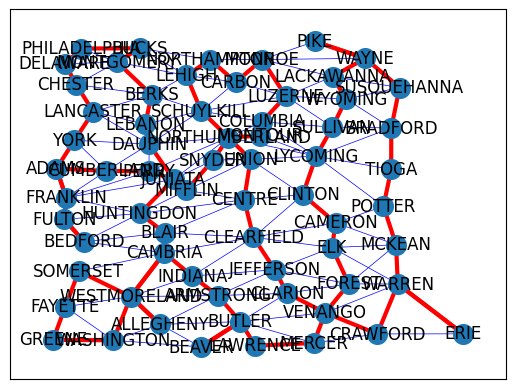

In [32]:
import matplotlib.pyplot as plt
edge_list = list(nx.utils.pairwise(tsp))

# Draw closest edges on each node only
nx.draw_networkx_edges(county_graph, pos=centroids, edge_color="blue", width=0.5)

# Draw the route
nx.draw_networkx(
    county_graph,
    pos=centroids,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

print("The route of the traveller is:", tsp)
plt.show()

In [19]:
import shapely
print(str(67 - len(muni_list)) + '/67 Counties In PA Visited')
start_node = ox.distance.nearest_nodes(G, -79.367773, 41.208485)
# for index, row in munis.iterrows():
#   i = row['geometry']
#   if i.contains(shapely.Point(G.nodes()[start_node]['x'], G.nodes()[start_node]['y'])):
#     x = row['COUNTY_NAM']
#     muni_list = muni_list.loc[munis['COUNTY_NAM']!=x]
#     print(x + ' visited.')
# print(str(67 - len(muni_list)) + '/67 Counties In PA Visited')
while len(muni_list) > 0:
  for i in range(len(tsp)):
    muni_list = muni_list.loc[munis['COUNTY_NAM']!=tsp[i]]
    print(tsp[i] + ' visited.')
    print(str(67 - len(muni_list)) + '/67 Counties In PA Visited')

0/67 Counties In PA Visited
CLARION visited.
1/67 Counties In PA Visited
VENANGO visited.
2/67 Counties In PA Visited
CRAWFORD visited.
3/67 Counties In PA Visited
WARREN visited.
4/67 Counties In PA Visited
ERIE visited.
5/67 Counties In PA Visited
WARREN visited.
5/67 Counties In PA Visited
MCKEAN visited.
6/67 Counties In PA Visited
POTTER visited.
7/67 Counties In PA Visited
TIOGA visited.
8/67 Counties In PA Visited
BRADFORD visited.
9/67 Counties In PA Visited
SUSQUEHANNA visited.
10/67 Counties In PA Visited
WAYNE visited.
11/67 Counties In PA Visited
PIKE visited.
12/67 Counties In PA Visited
WAYNE visited.
12/67 Counties In PA Visited
LACKAWANNA visited.
13/67 Counties In PA Visited
WYOMING visited.
14/67 Counties In PA Visited
SULLIVAN visited.
15/67 Counties In PA Visited
LYCOMING visited.
16/67 Counties In PA Visited
CLINTON visited.
17/67 Counties In PA Visited
CAMERON visited.
18/67 Counties In PA Visited
ELK visited.
19/67 Counties In PA Visited
FOREST visited.
20/67 Cou

In [20]:
count = 0
for i in G.nodes():
  print(G.nodes()[i])

Streaming output truncated to the last 5000 lines.
{'y': 40.6205178, 'x': -79.6357723, 'street_count': 3, 'muni': 'WESTMORELAND'}
{'y': 40.6187242, 'x': -79.6335709, 'street_count': 3, 'muni': 'WESTMORELAND'}
{'y': 40.6163335, 'x': -79.6288783, 'street_count': 3, 'muni': 'WESTMORELAND'}
{'y': 40.607879, 'x': -79.6117108, 'highway': 'traffic_signals', 'street_count': 3, 'muni': 'WESTMORELAND'}
{'y': 40.6172894, 'x': -79.6219451, 'street_count': 3, 'muni': 'WESTMORELAND'}
{'y': 40.4915771, 'x': -79.6943428, 'street_count': 3, 'muni': 'WESTMORELAND'}
{'y': 40.4921052, 'x': -79.6930379, 'street_count': 3, 'muni': 'WESTMORELAND'}
{'y': 40.5000307, 'x': -79.6813905, 'highway': 'motorway_junction', 'street_count': 3, 'muni': 'WESTMORELAND'}
{'y': 40.553933, 'x': -79.7578274, 'street_count': 3, 'muni': 'WESTMORELAND'}
{'y': 40.5988626, 'x': -79.6837617, 'street_count': 3, 'muni': 'WESTMORELAND'}
{'y': 40.6917034, 'x': -79.711599, 'street_count': 4, 'muni': 'BUTLER'}
{'y': 40.8271818, 'x': -79.

In [35]:
path = tsp
curr = 0
nodesInCurr = []
route = []
for i in G.nodes():
  if G.nodes()[i].get('muni') == path[curr]:
    nodesInCurr.append(i)
nodesInNext = []
for i in G.nodes():
  if G.nodes()[i].get('muni') == path[curr+1]:
    nodesInNext.append(i)
nodesInNextNext = []
for i in G.nodes():
  if G.nodes()[i].get('muni') == path[curr+2]:
    nodesInNextNext.append(i)

count = 0
for p in nx.all_shortest_paths(G, nodesInCurr[0], nodesInNextNext[0]):
  temp_routes = {}
  temp_routes[count] = []
  for i in p:
    temp_routes[count].append(i)
  count += 1


temp_routes

# ox.plot_graph_route(G, route)


# [nodesInCurr, nodesInNext, nodesInNextNext]
# for (i,j) in [(nodesInCurr,0), (nodesInNext,1), (nodesInNextNext,2)]:
#   print(f'{len(i)} nodes in {path[j].lower()} county')

{1: [106159055,
  106255278,
  106196478,
  106197895,
  106197661,
  106177759,
  106190852,
  106275443,
  106190856,
  106211557,
  106203046,
  106321847,
  201055425,
  201032602,
  4598776305,
  4598776372,
  2687850894,
  4597243289,
  201037779,
  200882032,
  99303283]}

In [22]:
`# All nodes in Clarion County Pennsylvania
for i in nodesInCurr:
  print('Vague Information:')
  print(G.nodes()[i])
  print('Extensive Information:')
  print(G[i])

Vague Information:
{'y': 41.1791748, 'x': -79.3451757, 'ref': '64', 'highway': 'motorway_junction', 'street_count': 3, 'muni': 'CLARION'}
Extensive Information:
{106159061: {0: {'osmid': 11842141, 'oneway': True, 'lanes': '1', 'highway': 'motorway_link', 'reversed': False, 'length': 451.08700000000005, 'geometry': <LINESTRING (-79.345 41.179, -79.346 41.179, -79.346 41.179, -79.347 41.179,...>}}, 106255278: {0: {'osmid': 33881520, 'oneway': True, 'lanes': '2', 'ref': 'I 80', 'highway': 'motorway', 'maxspeed': '70 mph', 'reversed': False, 'length': 1007.5020000000001, 'geometry': <LINESTRING (-79.345 41.179, -79.347 41.179, -79.348 41.178, -79.349 41.178,...>}}}
Vague Information:
{'y': 41.1785616, 'x': -79.350441, 'street_count': 3, 'muni': 'CLARION'}
Extensive Information:
{106250092: {0: {'osmid': 11842141, 'oneway': True, 'lanes': '1', 'highway': 'motorway_link', 'reversed': False, 'length': 106.708, 'geometry': <LINESTRING (-79.35 41.179, -79.351 41.179, -79.351 41.179, -79.351 41.

In [23]:
# Subsetting 5 County Paths Methodology
curr = 0
path = tsp
route = [] # Route will be ordered list of node indexes (G[route[i]] for i in route)
while len(tsp) > 0:
  if len(path) < 5:
    print('Houston, we have a problem')
    break
  if curr == 0:
    nodesInCurr = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr]:
        nodesInCurr.append(i)
    nodesInNext = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr+1]:
        nodesInNext.append(i)
    nodesInNextNext = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr+2]:
        nodesInNextNext.append(i)
  elif curr == 1:
    nodesInPrev = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr-1]:
        nodesInPrev.append(i)
    nodesInCurr = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr]:
        nodesInCurr.append(i)
    nodesInNext = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr+1]:
        nodesInNext.append(i)
    nodesInNextNext = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr+2]:
        nodesInNextNext.append(i)
  elif curr == len(path) - 2:
    nodesInPrevPrev = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr-2]:
        nodesInPrevPrev.append(i)
    nodesInPrev = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr-1]:
        nodesInPrev.append(i)
    nodesInCurr = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr]:
        nodesInCurr.append(i)
    nodesInNext = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr+1]:
        nodesInNext.append(i)
  elif curr == len(path) - 1:
    nodesInPrevPrev = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr-2]:
        nodesInPrevPrev.append(i)
    nodesInPrev = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr-1]:
        nodesInPrev.append(i)
    nodesInCurr = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr]:
        nodesInCurr.append(i)
  else: # MAIN ALGORITHM FOR NON-EXTREMITIES OF ROUTE
    nodesInPrevPrev = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr-2]:
        nodesInPrevPrev.append(i)
    nodesInPrev = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr-1]:
        nodesInPrev.append(i)
    nodesInCurr = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr]:
        nodesInCurr.append(i)
    nodesInNext = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr+1]:
        nodesInNext.append(i)
    nodesInNextNext = []
    for i in G.nodes():
      if G.nodes()[i].get('muni') == path[curr+2]:
        nodesInNextNext.append(i)

KeyboardInterrupt: 

THIS COLAB FILE WAS USED FOR PRELIMINARY EXPERIMENTATION--FULL METHODS WILL BE IN .PY FILES IN MAIN FOLDER